## 第三回課題

二次システムの K, ωn, ζ の以下のそれぞれの組み合わせについて，時間応答を Python で重ねてプロッ トせよ。また，過渡応答評価指標の 2 つを意識して ωn や ζ をどのように変えると応答がどのように変わ るのか(何が変わって何が変わらないのか)を述べよ。

1. K =1, ζ =0.3 で, $\omega_n$ =0.1,0.5,1.0 [rad/s] の3通り
2. K =1, $\omega_n$ =0.5 [rad/s] で, ζ =0.2,0.5,0.8 の3通り
3. K = 1 で, ($\omega_n$,ζ) = (0.2,0.8),(0.4,0.4),(0.8,0.2) の 3 通り

プロットするグラフは以下のような書式にすること
 - 横軸の範囲は 0 s から 30 s で 100 点，グリッド線あり，凡例あり，軸ラベルあり
 - 青実線，緑破線，赤一点鎖線の 3 本

 ### 1. K =1, ζ =0.3 で, $\omega_n$ =0.1,0.5,1.0 [rad/s] の3通り

In [1]:
# 各種ライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

In [2]:
#変数パラーメータ配列
vals = [0.1, 0.5, 1.0]
# パラメータの定義
params = {"k": 2.0, "zeta": 0.3, "omega_n": vals}

#グラフスタイル設定
color = {vals[0]: "blue", vals[1]: "green", vals[2]: "red"}
linestyle = {vals[0]: "-", vals[1]: "--", vals[2]: "-."}

In [3]:
#横軸の定義
t = np.linspace(0,30,100)

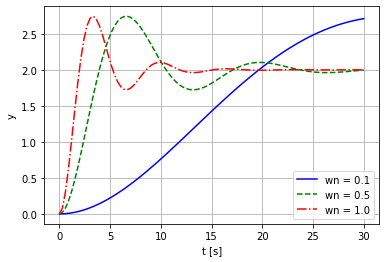

In [4]:
for wn in params["omega_n"]:
    #伝達関数の分子・分母多項式の演算
    n = [params["k"]*wn**2]
    d = [1, 2*params["zeta"]*wn, wn**2]
    #システムの伝達関数を定義
    P = tf(n, d)
    #システムのステップ応答を計算
    y, t = step(P, t)

    #グラフの出力
    plt.plot(t, y , color=color[wn], linestyle=linestyle[wn], label="wn = {}".format(wn))

plt.xlabel("t [s]")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

グラフより$\omega_n$を大きくすると，振動の振幅は変化せず，収束までの時間が早くなることがわかる．

 ### 2. K =1, $\omega_n$ =0.5 [rad/s] で, ζ =0.2,0.5,0.8 の3通り

In [5]:
#変数パラーメータ配列
vals = [0.2, 0.5, 0.8]
# パラメータの定義
params = {"k": 2.0, "zeta": vals, "omega_n": 0.5}

#グラフスタイル設定
color = {vals[0]: "blue", vals[1]: "green", vals[2]: "red"}
linestyle = {vals[0]: "-", vals[1]: "--", vals[2]: "-."}

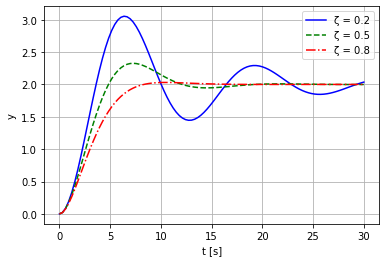

In [6]:
for zeta in params["zeta"]:
    #伝達関数の分子・分母多項式の演算
    n = [params["k"]*params["omega_n"]**2]
    d = [1, 2*zeta*params["omega_n"], params["omega_n"]**2]
    #システムの伝達関数を定義
    P = tf(n, d)
    #システムのステップ応答を計算
    y, t = step(P, t)

    #グラフの出力
    plt.plot(t, y , color=color[zeta], linestyle=linestyle[zeta], label="ζ = {}".format(zeta))

plt.xlabel("t [s]")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

ζを大きくすると，収束までの振動の周期は変化せず，振動の減衰が速くなることがわかる．

### 3. K = 1 で, ($\omega_n$,ζ) = (0.2,0.8),(0.4,0.4),(0.8,0.2) の 3 通り

In [7]:
#変数パラーメータ配列
vals = [(0.2, 0.8), (0.4,0.4), (0.8,0.2)]
k = 1

#グラフスタイル設定
color = {vals[0]: "blue", vals[1]: "green", vals[2]: "red"}
linestyle = {vals[0]: "-", vals[1]: "--", vals[2]: "-."}

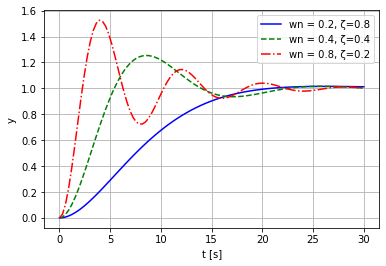

In [8]:
for wn, zeta in vals:
    #伝達関数の分子・分母多項式の演算
    n = [k*wn**2]
    d = [1, 2*zeta*wn, wn**2]
    #システムの伝達関数を定義
    P = tf(n, d)
    #システムのステップ応答を計算
    y, t = step(P, t)

    #グラフの出力
    plt.plot(t, y , color=color[(wn, zeta)], linestyle=linestyle[(wn, zeta)], label="wn = {}, ζ={}".format(wn, zeta))

plt.xlabel("t [s]")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

$\omega_n$とζを組み合わせることで，システムが定常状態に向かうまでの動作を安定させることができる．